In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
# Complete Data File

clean_merged_data_path = 'Resources/clean_merged_data.csv'

# Read CSV

complete_data = pd.read_csv(clean_merged_data_path)

# Display Df

complete_data


,Unnamed: 0,County,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$200,000 or more",Median income (dollars),Mean income (dollars),Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,Fiscal Year,Region,Type of Allegation,Allegation Count
0,0,Angelina,"34,276",5.1%,3.9%,10.5%,9.5%,15.6%,18.0%,11.3%,...,4.7%,"58,180","79,881",39.7%,(X),(X),2022.0,5-Beaumont,Abandonment,3.0
1,1,Angelina,"34,276",5.1%,3.9%,10.5%,9.5%,15.6%,18.0%,11.3%,...,4.7%,"58,180","79,881",39.7%,(X),(X),2022.0,5-Beaumont,Emotional Abuse,32.0
2,2,Angelina,"34,276",5.1%,3.9%,10.5%,9.5%,15.6%,18.0%,11.3%,...,4.7%,"58,180","79,881",39.7%,(X),(X),2022.0,5-Beaumont,Medical Neglect,63.0
3,3,Angelina,"34,276",5.1%,3.9%,10.5%,9.5%,15.6%,18.0%,11.3%,...,4.7%,"58,180","79,881",39.7%,(X),(X),2022.0,5-Beaumont,Neglectful Supervision,684.0
4,4,Angelina,"34,276",5.1%,3.9%,10.5%,9.5%,15.6%,18.0%,11.3%,...,4.7%,"58,180","79,881",39.7%,(X),(X),2022.0,5-Beaumont,Physical Abuse,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,4434,Wise,"25,430",3.0%,2.4%,5.2%,7.3%,11.9%,15.0%,14.4%,...,11.6%,"80,305","106,665",41.7%,(X),(X),2013.0,3-Arlington,Neglectful Supervision,409.0
4431,4435,Wise,"25,430",3.0%,2.4%,5.2%,7.3%,11.9%,15.0%,14.4%,...,11.6%,"80,305","106,665",41.7%,(X),(X),2013.0,3-Arlington,Physical Abuse,173.0
4432,4436,Wise,"25,430",3.0%,2.4%,5.2%,7.3%,11.9%,15.0%,14.4%,...,11.6%,"80,305","106,665",41.7%,(X),(X),2013.0,3-Arlington,Physical Neglect,93.0
4433,4437,Wise,"25,430",3.0%,2.4%,5.2%,7.3%,11.9%,15.0%,14.4%,...,11.6%,"80,305","106,665",41.7%,(X),(X),2013.0,3-Arlington,Refusal To Accept Parental Responsibility,4.0


In [2]:
# check how many counties there are

len(complete_data['County'].unique())

51

In [3]:
# check for duplicate counties and medians

duplicate = complete_data[complete_data.duplicated(['County', 'Median income (dollars)'])]
len(duplicate)

4384

In [4]:
# get all of the duplicate data

duplicate
show_duplicates = complete_data[complete_data.duplicated(['County', 'Median income (dollars)'])]
show_duplicates.value_counts()

Unnamed: 0  County      Total        Less than $10,000      $10,000 to $14,999      $15,000 to $24,999      $25,000 to $34,999      $35,000 to $49,999      $50,000 to $74,999      $75,000 to $99,999      $100,000 to $149,999      $150,000 to $199,999      $200,000 or more  Median income (dollars)  Mean income (dollars)      Household income in the past 12 months      Family income in the past 12 months      Nonfamily income in the past 12 months  Fiscal Year  Region       Type of Allegation                         Allegation Count
1           Angelina    34,276   5.1%                   3.9%                    10.5%                   9.5%                    15.6%                   18.0%                   11.3%                   12.9%                     8.4%                      4.7%                  58,180                   79,881                 39.7%                                       (X)                                      (X)                                         2022.0      

In [5]:
# create a clean Df dropping the duplicates

clean_df = complete_data.drop_duplicates(subset = ['County', 'Median income (dollars)'])
clean_df

,Unnamed: 0,County,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$200,000 or more",Median income (dollars),Mean income (dollars),Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,Fiscal Year,Region,Type of Allegation,Allegation Count
0,0,Angelina,"34,276",5.1%,3.9%,10.5%,9.5%,15.6%,18.0%,11.3%,...,4.7%,"58,180","79,881",39.7%,(X),(X),2022.0,5-Beaumont,Abandonment,3.0
82,82,Bastrop,"37,278",6.3%,3.6%,6.1%,5.3%,12.6%,19.1%,11.8%,...,4.9%,"72,663","87,467",41.1%,(X),(X),2022.0,7-Austin,Emotional Abuse,45.0
165,165,Bell,"143,361",6.7%,3.6%,6.9%,8.5%,14.1%,20.2%,13.7%,...,6.1%,"62,137","85,250",35.1%,(X),(X),2022.0,7-Austin,Abandonment,24.0
256,256,Bexar,"754,632",5.3%,4.4%,7.9%,8.0%,11.9%,18.6%,13.7%,...,7.4%,"65,854","89,010",33.2%,(X),(X),2022.0,8-San Antonio,Abandonment,43.0
351,351,Bowie,"35,469",8.7%,5.9%,10.3%,9.9%,15.3%,20.3%,9.3%,...,5.8%,"49,771","74,515",42.2%,(X),(X),2022.0,4-Tyler,Abandonment,5.0
439,439,Brazoria,"133,871",3.7%,2.1%,5.9%,5.7%,8.7%,16.9%,14.0%,...,12.9%,"86,083","109,010",36.0%,(X),(X),2022.0,6-Houston,Abandonment,4.0
528,528,Brazos,"93,580",11.0%,4.8%,7.9%,10.2%,10.7%,14.1%,11.3%,...,7.9%,"60,393","84,794",41.5%,(X),(X),2022.0,7-Austin,Emotional Abuse,58.0
613,613,Cameron,"137,982",8.2%,5.6%,12.8%,11.3%,11.6%,18.0%,13.1%,...,3.0%,"50,649","66,163",38.8%,(X),(X),2022.0,11-Edinburg,Abandonment,7.0
703,703,Collin,"414,601",2.9%,1.3%,2.8%,4.9%,6.3%,13.5%,12.5%,...,22.1%,"113,305","146,166",36.6%,(X),(X),2022.0,3-Arlington,Abandonment,7.0
794,794,Comal,"70,544",2.8%,3.3%,4.0%,5.7%,8.0%,15.5%,15.4%,...,16.4%,"91,171","119,817",28.7%,(X),(X),2022.0,8-San Antonio,Abandonment,5.0


In [6]:
# create a new summary using only the county and median household income
income_by_county = clean_df[['County', 'Median income (dollars)']]
income_by_county = income_by_county.set_index('County')
income_by_county
#hh_income_by_county_df = pd.DataFrame(clean_df[selected_columns])
#hh_income_by_county_df.head()

,Median income (dollars)
County,
Angelina,"58,180"
Bastrop,"72,663"
Bell,"62,137"
Bexar,"65,854"
Bowie,"49,771"
Brazoria,"86,083"
Brazos,"60,393"
Cameron,"50,649"
Collin,"113,305"


In [7]:
data = {
    'County': ['Angelina', 'Bastrop', 'Bell', 'Bexar', 'Bowie', 'Brazoria', 'Brazos', 'Cameron', 'Collin', 'Comal',
               'Coryell', 'Dallas', 'Denton', 'Ector', 'Ellis', 'Galveston', 'Grayson', 'Gregg', 'Guadalupe', 'Harris',
               'Harrison', 'Hays', 'Henderson', 'Hidalgo', 'Hood', 'Hunt', 'Jefferson', 'Johnson', 'Kaufman', 'Liberty',
               'Lubbock', 'McLennan', 'Midland', 'Montgomery', 'Nueces', 'Orange', 'Parker', 'Potter', 'Randall',
               'Rockwall', 'Smith', 'Starr', 'Tarrant', 'Taylor', 'Travis', 'Victoria', 'Walker', 'Webb', 'Wichita',
               'Williamson', 'Wise'],
    'MedianIncome': [58180, 72663, 62137, 65854, 49771, 86083, 60393, 50649, 113305, 91171, 65846, 70852, 102428,
                     68071, 89856, 75565, 66106, 61496, 87030, 68706, 69212, 88617, 65283, 49142, 69462, 69253, 54797,
                     76320, 94868, 61525, 59161, 64320, 76332, 94972, 60361, 64601, 96017, 50661, 76744, 123767, 68192,
                     33871, 76210, 62107, 95259, 71192, 51528, 59603, 56944, 101323, 80305]
}

income_by_county_df = pd.DataFrame(data)

In [8]:
income_by_county.sort_values(by='Median income (dollars)', inplace=True, ascending=False)

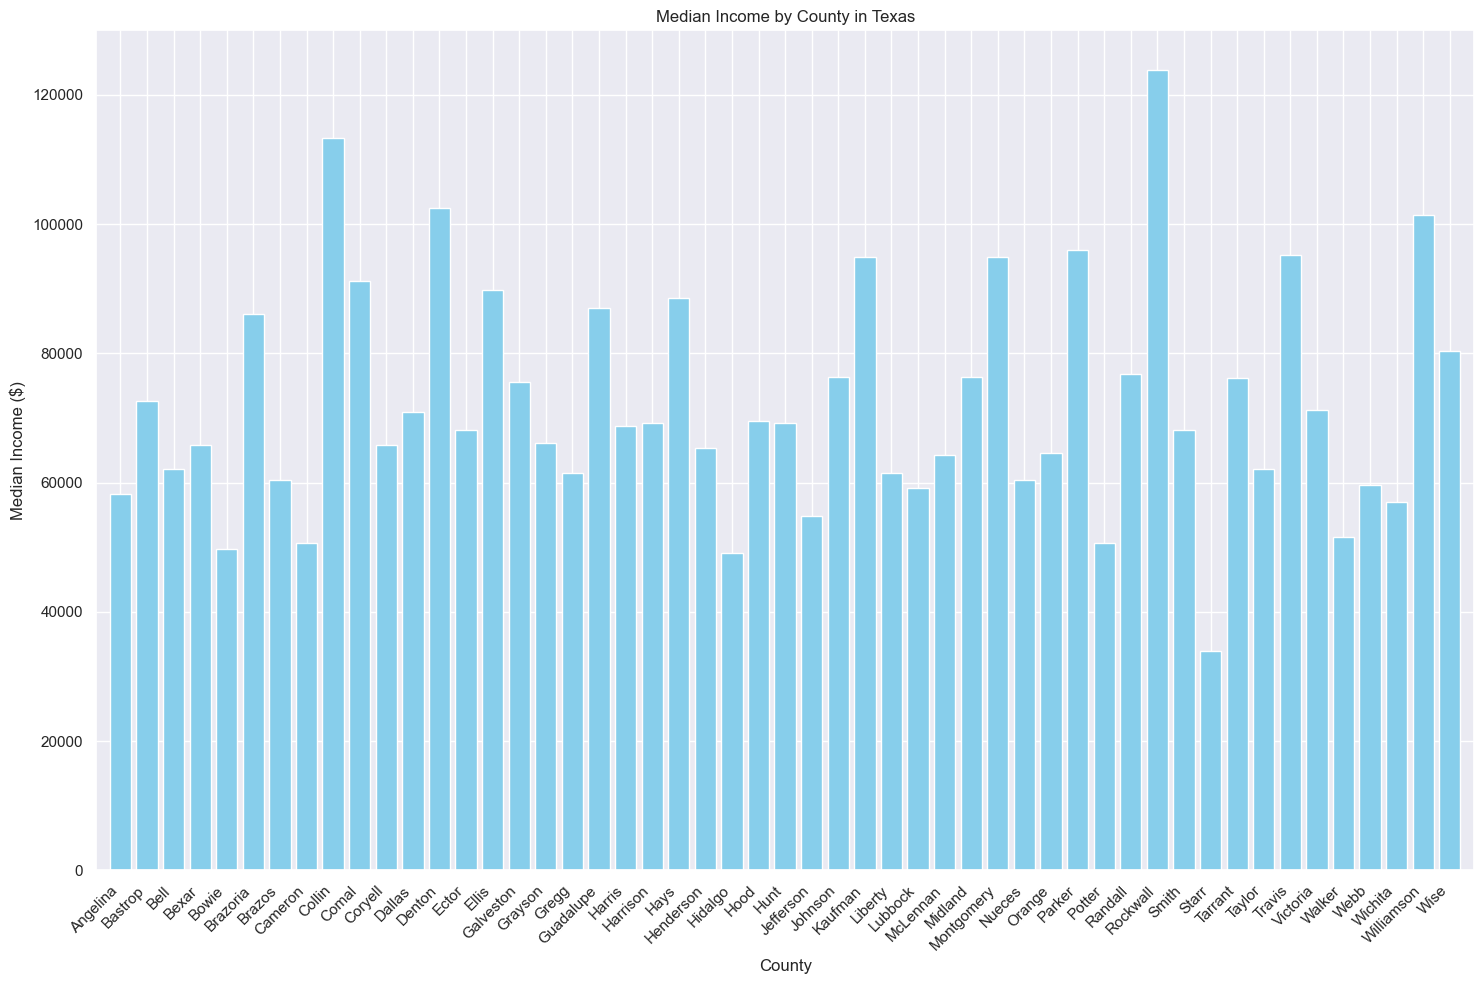

In [56]:
# create a bar graph to show the incomes in each county
plt.figure(figsize=(15, 10))
plt.bar(income_by_county_df['County'], income_by_county_df['MedianIncome'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Median Income ($)')
plt.title('Median Income by County in Texas')
plt.xticks(rotation=45, ha='right',) 
sns.set_style(style='darkgrid')
plt.tight_layout()
plt.margins(x=0.01)
plt.savefig('Images/Med_Household_Income_by_County_Bar.png')

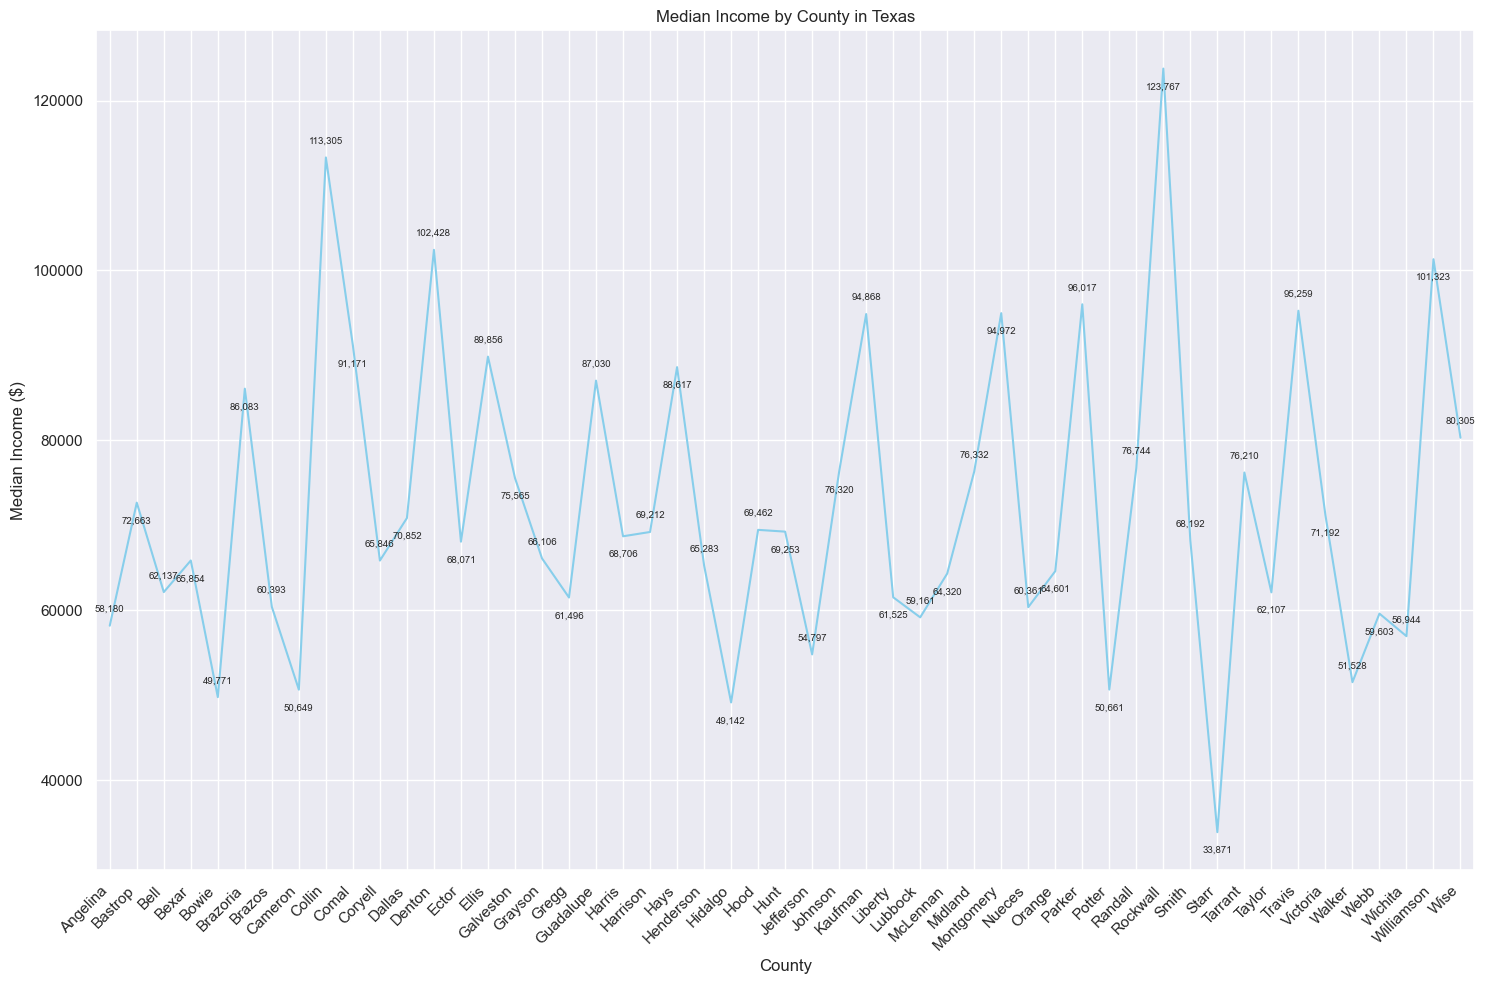

In [57]:
# create a line graph showing the median income by county
plt.figure(figsize=(15, 10))
plt.plot(income_by_county_df['County'], income_by_county_df['MedianIncome'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Median Income ($)')
plt.title('Median Income by County in Texas')
plt.xticks(rotation=45, ha='right',) 
sns.set_theme(style='darkgrid')
plt.tight_layout()
plt.margins(x=0.01)
# Add points at the top of each line with improved spacing
for i, (county, income) in enumerate(zip(income_by_county_df['County'], income_by_county_df['MedianIncome'])):
    # Use i % 2 to alternate the vertical position of the annotations
    offset = 10 if i % 2 == 0 else -15
    plt.annotate(f'{income:,}', (county, income), textcoords="offset points", xytext=(0, offset),
                 ha='center', fontsize=7)






plt.savefig('Images/Med_Household_Income_by_County_Line.png')